Hello, this notebook will be mainly used for the capstone project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [11, 4]
plt.rcParams['figure.dpi'] = 100

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import collections

In [2]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


# Car accident severity prediction

In [3]:
# Read .csv into dataframe:
data=pd.read_csv('Data-Collisions.csv')
# Set target column as index column:
data.set_index('SEVERITYCODE', inplace=True)
data

C:\Users\javes\Anaconda3\envs\NLP\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
SEVERITYCODE,,,,,,,,,,,,,,,,,,,,,
2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,-122.290826,47.565408,219543,309534,310814,E871089,Matched,Block,NaN,34TH AVE S BETWEEN S DAKOTA ST AND S GENESEE ST,...,Dry,Daylight,NaN,NaN,NaN,24,From opposite direction - both moving - head-on,0,0,N
1,-122.344526,47.690924,219544,309085,310365,E876731,Matched,Block,NaN,AURORA AVE N BETWEEN N 85TH ST AND N 86TH ST,...,Wet,Daylight,NaN,NaN,NaN,13,From same direction - both going straight - bo...,0,0,N
2,-122.306689,47.683047,219545,311280,312640,3809984,Matched,Intersection,24760.0,20TH AVE NE AND NE 75TH ST,...,Dry,Daylight,NaN,NaN,NaN,28,From opposite direction - one left turn - one ...,0,0,N


In [4]:
# Drop unneeded (for diferent reasons explained in the report) columns:
data=data.drop(['X', 'Y', 'SEVERITYCODE.1', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYDESC', 'PERSONCOUNT', 'INCDATE', 'SDOT_COLCODE', 'SDOT_COLDESC', 'INATTENTIONIND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'], axis=1)

In [5]:
data

,COLLISIONTYPE,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND
SEVERITYCODE,,,,,,,,,,
2,Angles,0,0,2,3/27/2013 2:54:00 PM,At Intersection (intersection related),N,Overcast,Wet,Daylight
1,Sideswipe,0,0,2,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On
1,Parked Car,0,0,3,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight
1,Other,0,0,3,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),N,Clear,Dry,Daylight
2,Angles,0,0,2,1/28/2004 8:04:00 AM,At Intersection (intersection related),0,Raining,Wet,Daylight
...,...,...,...,...,...,...,...,...,...,...
2,Head On,0,0,2,11/12/2018 8:12:00 AM,Mid-Block (not related to intersection),N,Clear,Dry,Daylight
1,Rear Ended,0,0,2,12/18/2018 9:14:00 AM,Mid-Block (not related to intersection),N,Raining,Wet,Daylight
2,Left Turn,0,0,2,1/19/2019 9:25:00 AM,At Intersection (intersection related),N,Clear,Dry,Daylight


In [6]:
# Drop any row with blank entries in any of their columns:
data=data.dropna()

In [7]:
data

,COLLISIONTYPE,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND
SEVERITYCODE,,,,,,,,,,
2,Angles,0,0,2,3/27/2013 2:54:00 PM,At Intersection (intersection related),N,Overcast,Wet,Daylight
1,Sideswipe,0,0,2,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On
1,Parked Car,0,0,3,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight
1,Other,0,0,3,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),N,Clear,Dry,Daylight
2,Angles,0,0,2,1/28/2004 8:04:00 AM,At Intersection (intersection related),0,Raining,Wet,Daylight
...,...,...,...,...,...,...,...,...,...,...
2,Head On,0,0,2,11/12/2018 8:12:00 AM,Mid-Block (not related to intersection),N,Clear,Dry,Daylight
1,Rear Ended,0,0,2,12/18/2018 9:14:00 AM,Mid-Block (not related to intersection),N,Raining,Wet,Daylight
2,Left Turn,0,0,2,1/19/2019 9:25:00 AM,At Intersection (intersection related),N,Clear,Dry,Daylight


In [8]:
# Colummn called "UNDERINFL" seems to have different entries for the same information (0=N, 1=Y):
data.UNDERINFL.value_counts()

N    95132
0    79043
Y     5024
1     3978
Name: UNDERINFL, dtype: int64

In [9]:
# Let's fix it:
data['UNDERINFL'] = data['UNDERINFL'].str.replace('0','N')
data['UNDERINFL'] = data['UNDERINFL'].str.replace('1','Y')        

C:\Users\javes\Anaconda3\envs\NLP\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\javes\Anaconda3\envs\NLP\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
data.UNDERINFL.value_counts()

N    174175
Y      9002
Name: UNDERINFL, dtype: int64

In [11]:
# Fixed!
# Now, the column 'COLLISIONTYPE' has some entries with the value 'Other'.
data.COLLISIONTYPE.value_counts()

Parked Car    43272
Angles        34464
Rear Ended    33683
Other         22999
Sideswipe     18312
Left Turn     13641
Pedestrian     6515
Cycles         5365
Right Turn     2930
Head On        1996
Name: COLLISIONTYPE, dtype: int64

In [12]:
# We are going to drop those rows:
data = data[data.COLLISIONTYPE != 'Other']
data.COLLISIONTYPE.value_counts()

Parked Car    43272
Angles        34464
Rear Ended    33683
Sideswipe     18312
Left Turn     13641
Pedestrian     6515
Cycles         5365
Right Turn     2930
Head On        1996
Name: COLLISIONTYPE, dtype: int64

In [13]:
data.JUNCTIONTYPE.value_counts()

Mid-Block (not related to intersection)              74453
At Intersection (intersection related)               57759
Mid-Block (but intersection related)                 19228
Driveway Junction                                     6791
At Intersection (but not related to intersection)     1812
Ramp Junction                                          130
Unknown                                                  5
Name: JUNCTIONTYPE, dtype: int64

In [14]:
data = data[data.JUNCTIONTYPE != 'Unknown']
data['JUNCTIONTYPE'] = data['JUNCTIONTYPE'].str.replace('but not related to intersection','NRI')
data['JUNCTIONTYPE'] = data['JUNCTIONTYPE'].str.replace('not related to intersection','NRI')
data['JUNCTIONTYPE'] = data['JUNCTIONTYPE'].str.replace('but intersection related','RI')
data['JUNCTIONTYPE'] = data['JUNCTIONTYPE'].str.replace('intersection related','RI')
data.JUNCTIONTYPE.value_counts()

Mid-Block (NRI)          74453
At Intersection (RI)     57759
Mid-Block (RI)           19228
Driveway Junction         6791
At Intersection (NRI)     1812
Ramp Junction              130
Name: JUNCTIONTYPE, dtype: int64

In [15]:
data['INCDTTM']=pd.to_datetime(data.INCDTTM)
data['TIME'] = data['INCDTTM'].dt.strftime('%H')
data['DAY_OF_WEEK'] = data['INCDTTM'].dt.day_name()
data['MONTH'] = data['INCDTTM'].dt.month_name()

In [16]:
data

,COLLISIONTYPE,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,TIME,DAY_OF_WEEK,MONTH
SEVERITYCODE,,,,,,,,,,,,,
2,Angles,0,0,2,2013-03-27 14:54:00,At Intersection (RI),N,Overcast,Wet,Daylight,14,Wednesday,March
1,Sideswipe,0,0,2,2006-12-20 18:55:00,Mid-Block (NRI),N,Raining,Wet,Dark - Street Lights On,18,Wednesday,December
1,Parked Car,0,0,3,2004-11-18 10:20:00,Mid-Block (NRI),N,Overcast,Dry,Daylight,10,Thursday,November
2,Angles,0,0,2,2004-01-28 08:04:00,At Intersection (RI),N,Raining,Wet,Daylight,08,Wednesday,January
1,Angles,0,0,2,2019-04-20 17:42:00,At Intersection (RI),N,Clear,Dry,Daylight,17,Saturday,April
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,Head On,0,0,2,2018-11-12 08:12:00,Mid-Block (NRI),N,Clear,Dry,Daylight,08,Monday,November
1,Rear Ended,0,0,2,2018-12-18 09:14:00,Mid-Block (NRI),N,Raining,Wet,Daylight,09,Tuesday,December
2,Left Turn,0,0,2,2019-01-19 09:25:00,At Intersection (RI),N,Clear,Dry,Daylight,09,Saturday,January


(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
        16000.]), <a list of 9 Text yticklabel objects>)

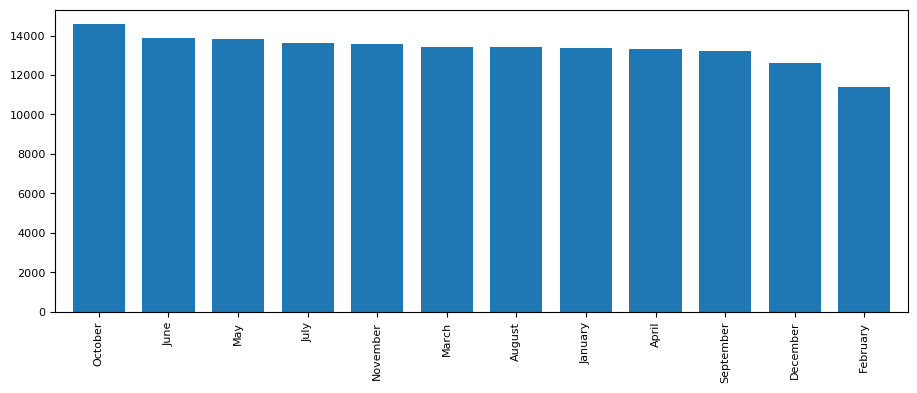

In [17]:
data.MONTH.value_counts().plot.bar(width=0.75)
plt.xticks(size = 8)
plt.yticks(size = 8)

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000.]),
 <a list of 7 Text yticklabel objects>)

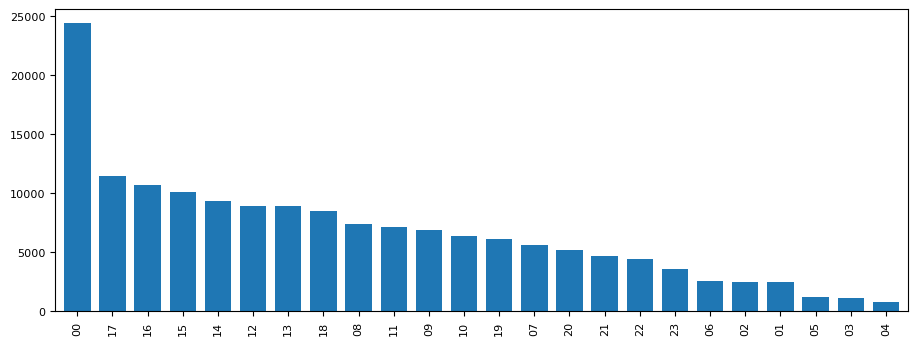

In [18]:
data.TIME.value_counts().plot.bar(width=0.75)
plt.xticks(size = 8)
plt.yticks(size = 8)

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000.]),
 <a list of 7 Text yticklabel objects>)

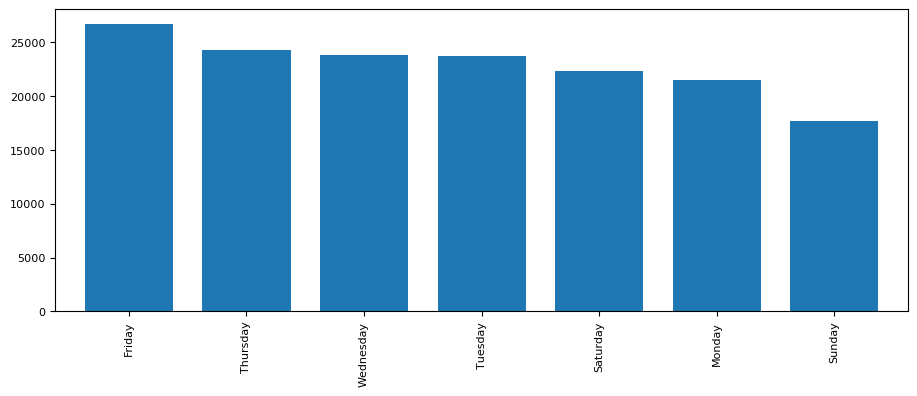

In [19]:
data.DAY_OF_WEEK.value_counts().plot.bar(width=0.75)
plt.xticks(size = 8)
plt.yticks(size = 8)

In [20]:
print(data.PEDCOUNT.value_counts())
print(data.PEDCYLCOUNT.value_counts())
print(data.VEHCOUNT.value_counts())

0    153382
1      6547
2       221
3        20
4         2
6         1
Name: PEDCOUNT, dtype: int64
0    154762
1      5370
2        41
Name: PEDCYLCOUNT, dtype: int64
2     132946
3      12411
1      11609
4       2311
5        501
0        194
6        136
7         39
8         12
9          8
11         4
12         1
10         1
Name: VEHCOUNT, dtype: int64


In [21]:
# Let's drop values wirh very low observations (< 100)


data = data[data.PEDCOUNT != 6]
data = data[data.PEDCOUNT != 4]
data = data[data.PEDCOUNT != 3]

data = data[data.PEDCYLCOUNT != 2]

data = data[data.VEHCOUNT != 10]
data = data[data.VEHCOUNT != 12]
data = data[data.VEHCOUNT != 11]
data = data[data.VEHCOUNT != 9]
data = data[data.VEHCOUNT != 8]
data = data[data.VEHCOUNT != 7]

In [22]:
print(data.PEDCOUNT.value_counts())
print(data.PEDCYLCOUNT.value_counts())
print(data.VEHCOUNT.value_counts())

0    153278
1      6545
2       221
Name: PEDCOUNT, dtype: int64
0    154674
1      5370
Name: PEDCYLCOUNT, dtype: int64
2    132942
3     12411
1     11563
4      2311
5       500
0       181
6       136
Name: VEHCOUNT, dtype: int64


In [23]:
data.columns

Index(['COLLISIONTYPE', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDTTM',
       'JUNCTIONTYPE', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'TIME',
       'DAY_OF_WEEK', 'MONTH'],
      dtype='object')

In [24]:
data=data.drop(['INCDTTM'], axis=1)

In [25]:
data.columns

Index(['COLLISIONTYPE', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'TIME', 'DAY_OF_WEEK',
       'MONTH'],
      dtype='object')

In [26]:
data.WEATHER.value_counts()

Clear                       96108
Raining                     27474
Overcast                    23394
Unknown                     11103
Snowing                       694
Other                         687
Fog/Smog/Smoke                434
Sleet/Hail/Freezing Rain       84
Blowing Sand/Dirt              46
Severe Crosswind               16
Partly Cloudy                   4
Name: WEATHER, dtype: int64

In [27]:
data = data[data.WEATHER != 'Unknown']
data = data[data.WEATHER != 'Other']
data = data[data.WEATHER != 'Partly Cloudy']
data = data[data.WEATHER != 'Severe Crosswind']
data = data[data.WEATHER != 'Blowing Sand/Dirt']
data = data[data.WEATHER != 'Sleet/Hail/Freezing Rain']

In [28]:
data.WEATHER.value_counts()

Clear             96108
Raining           27474
Overcast          23394
Snowing             694
Fog/Smog/Smoke      434
Name: WEATHER, dtype: int64

In [29]:
data.ROADCOND.value_counts()

Dry               106929
Wet                38942
Unknown              704
Ice                  696
Snow/Slush           671
Other                 59
Standing Water        49
Sand/Mud/Dirt         31
Oil                   23
Name: ROADCOND, dtype: int64

In [30]:
data = data[data.ROADCOND != 'Unknown']
data = data[data.ROADCOND != 'Other']
data = data[data.ROADCOND != 'Oil']
data = data[data.ROADCOND != 'Sand/Mud/Dirt']
data = data[data.ROADCOND != 'Standing Water']

In [31]:
data.ROADCOND.value_counts()

Dry           106929
Wet            38942
Ice              696
Snow/Slush       671
Name: ROADCOND, dtype: int64

In [32]:
data.LIGHTCOND.value_counts()

Daylight                    98781
Dark - Street Lights On     37544
Dusk                         4906
Unknown                      1993
Dawn                         1943
Dark - No Street Lights      1039
Dark - Street Lights Off      888
Other                         138
Dark - Unknown Lighting         6
Name: LIGHTCOND, dtype: int64

In [33]:
data = data[data.LIGHTCOND != 'Unknown']
data = data[data.LIGHTCOND != 'Other']
data = data[data.LIGHTCOND != 'Dark - Unknown Lighting']
data['LIGHTCOND'] = data['LIGHTCOND'].str.replace('Dark - No Street Lights','Dark - Street Lights Off')

In [34]:
data.LIGHTCOND.value_counts()

Daylight                    98781
Dark - Street Lights On     37544
Dusk                         4906
Dawn                         1943
Dark - Street Lights Off     1927
Name: LIGHTCOND, dtype: int64

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145101 entries, 2 to 1
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   COLLISIONTYPE  145101 non-null  object
 1   PEDCOUNT       145101 non-null  int64 
 2   PEDCYLCOUNT    145101 non-null  int64 
 3   VEHCOUNT       145101 non-null  int64 
 4   JUNCTIONTYPE   145101 non-null  object
 5   UNDERINFL      145101 non-null  object
 6   WEATHER        145101 non-null  object
 7   ROADCOND       145101 non-null  object
 8   LIGHTCOND      145101 non-null  object
 9   TIME           145101 non-null  object
 10  DAY_OF_WEEK    145101 non-null  object
 11  MONTH          145101 non-null  object
dtypes: int64(3), object(9)
memory usage: 14.4+ MB


In [36]:
data.columns

Index(['COLLISIONTYPE', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'TIME', 'DAY_OF_WEEK',
       'MONTH'],
      dtype='object')

In [37]:
# data['SEVERITYCODE'] = pd.Categorical(data['SEVERITYCODE'])
data['COLLISIONTYPE'] = pd.Categorical(data['COLLISIONTYPE'])
data['JUNCTIONTYPE'] = pd.Categorical(data['JUNCTIONTYPE'])
data['PEDCOUNT'] = pd.Categorical(data['PEDCOUNT'])
data['VEHCOUNT'] = pd.Categorical(data['VEHCOUNT'])
data['PEDCYLCOUNT'] = pd.Categorical(data['PEDCYLCOUNT'])
data['UNDERINFL'] = pd.Categorical(data['UNDERINFL'])
data['WEATHER'] = pd.Categorical(data['WEATHER'])
data['ROADCOND'] = pd.Categorical(data['ROADCOND'])
data['LIGHTCOND'] = pd.Categorical(data['LIGHTCOND'])
data['TIME'] = pd.Categorical(data['TIME'])
data['DAY_OF_WEEK'] = pd.Categorical(data['DAY_OF_WEEK'])
data['MONTH'] = pd.Categorical(data['MONTH'])

In [38]:
data.dtypes

COLLISIONTYPE    category
PEDCOUNT         category
PEDCYLCOUNT      category
VEHCOUNT         category
JUNCTIONTYPE     category
UNDERINFL        category
WEATHER          category
ROADCOND         category
LIGHTCOND        category
TIME             category
DAY_OF_WEEK      category
MONTH            category
dtype: object

In [39]:
fdummies = pd.get_dummies(data)

In [40]:
fdummies.columns

Index(['COLLISIONTYPE_Angles', 'COLLISIONTYPE_Cycles', 'COLLISIONTYPE_Head On',
       'COLLISIONTYPE_Left Turn', 'COLLISIONTYPE_Parked Car',
       'COLLISIONTYPE_Pedestrian', 'COLLISIONTYPE_Rear Ended',
       'COLLISIONTYPE_Right Turn', 'COLLISIONTYPE_Sideswipe', 'PEDCOUNT_0',
       'PEDCOUNT_1', 'PEDCOUNT_2', 'PEDCYLCOUNT_0', 'PEDCYLCOUNT_1',
       'VEHCOUNT_0', 'VEHCOUNT_1', 'VEHCOUNT_2', 'VEHCOUNT_3', 'VEHCOUNT_4',
       'VEHCOUNT_5', 'VEHCOUNT_6', 'JUNCTIONTYPE_At Intersection (NRI)',
       'JUNCTIONTYPE_At Intersection (RI)', 'JUNCTIONTYPE_Driveway Junction',
       'JUNCTIONTYPE_Mid-Block (NRI)', 'JUNCTIONTYPE_Mid-Block (RI)',
       'JUNCTIONTYPE_Ramp Junction', 'UNDERINFL_N', 'UNDERINFL_Y',
       'WEATHER_Clear', 'WEATHER_Fog/Smog/Smoke', 'WEATHER_Overcast',
       'WEATHER_Raining', 'WEATHER_Snowing', 'ROADCOND_Dry', 'ROADCOND_Ice',
       'ROADCOND_Snow/Slush', 'ROADCOND_Wet',
       'LIGHTCOND_Dark - Street Lights Off',
       'LIGHTCOND_Dark - Street Lights On', 'LI

In [41]:
fdummies.dtypes

COLLISIONTYPE_Angles        uint8
COLLISIONTYPE_Cycles        uint8
COLLISIONTYPE_Head On       uint8
COLLISIONTYPE_Left Turn     uint8
COLLISIONTYPE_Parked Car    uint8
                            ...  
MONTH_March                 uint8
MONTH_May                   uint8
MONTH_November              uint8
MONTH_October               uint8
MONTH_September             uint8
Length: 86, dtype: object

In [42]:
fdummies=fdummies.sample(frac=1)

In [43]:
fdummies

,COLLISIONTYPE_Angles,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,COLLISIONTYPE_Left Turn,COLLISIONTYPE_Parked Car,COLLISIONTYPE_Pedestrian,COLLISIONTYPE_Rear Ended,COLLISIONTYPE_Right Turn,COLLISIONTYPE_Sideswipe,PEDCOUNT_0,...,MONTH_December,MONTH_February,MONTH_January,MONTH_July,MONTH_June,MONTH_March,MONTH_May,MONTH_November,MONTH_October,MONTH_September
SEVERITYCODE,,,,,,,,,,,,,,,,,,,,,
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [44]:
X=fdummies
y=fdummies.index

In [45]:
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X,y)

### Logistic Regression

In [74]:
logreg = LogisticRegression(C=0.01, max_iter=10000)
logreg.fit(X_train, y_train) #This is where the training is taking place
y_pred_logreg = logreg.predict(X_test) #Making predictions to test the model on test data
print('Train accuracy: %s' % logreg.score(X_train, y_train)) #Train accuracy
print('Test accuracy: %s' % accuracy_score(y_pred_logreg, y_test)) #Test accuracy
print("F1-score: %.2f" % f1_score(y_test, y_pred_logreg, average='weighted') )
print(classification_report(y_test, y_pred_logreg))

Train accuracy: 0.730925798300023
Test accuracy: 0.7315856213474473
F1-score: 0.70
              precision    recall  f1-score   support

           1       0.73      0.93      0.82     24117
           2       0.72      0.33      0.45     12159

    accuracy                           0.73     36276
   macro avg       0.73      0.63      0.64     36276
weighted avg       0.73      0.73      0.70     36276



Confusion matrix, without normalization
[[22528  1589]
 [ 8148  4011]]
Normalized confusion matrix
[[0.93411287 0.06588713]
 [0.6701209  0.3298791 ]]


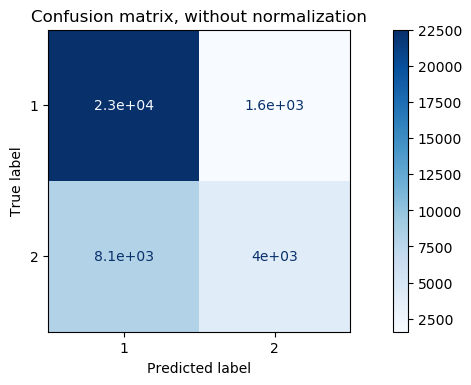

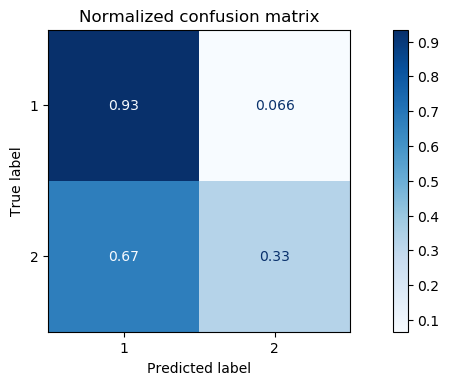

In [66]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(logreg, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

### Random Forest

In [67]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
a = np.array(Y_pred)
predict_random_forest = collections.Counter(a)
acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
print("Accuracy: {}".format(acc_random_forest))
print("F1-score: %.2f" % f1_score(y_test, Y_pred, average='weighted') )
print(classification_report(y_test, Y_pred))

Accuracy: 69.36
F1-score: 0.68
              precision    recall  f1-score   support

           1       0.75      0.82      0.78     24117
           2       0.55      0.45      0.49     12159

    accuracy                           0.69     36276
   macro avg       0.65      0.63      0.64     36276
weighted avg       0.68      0.69      0.68     36276



Confusion matrix, without normalization
[[19720  4397]
 [ 6719  5440]]
Normalized confusion matrix
[[0.81768047 0.18231953]
 [0.55259479 0.44740521]]


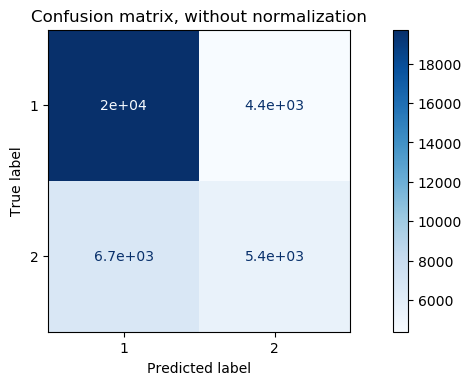

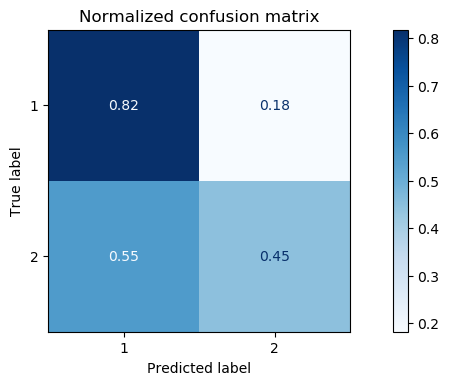

In [68]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(random_forest, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

### Decision Tree

72.25714805665713
72.24887789814575
72.22958200138747
73.1337673824158
73.10620018737791
73.13652486176511
73.0097245028141
72.97664044946382
72.96009975251832
72.90220750317046
72.73404799336198
72.51903716936272
72.24888891590562
72.02008423647304
71.8353863092556
71.59279879214958
71.23995351265181
71.16276574646842
70.87607679606582


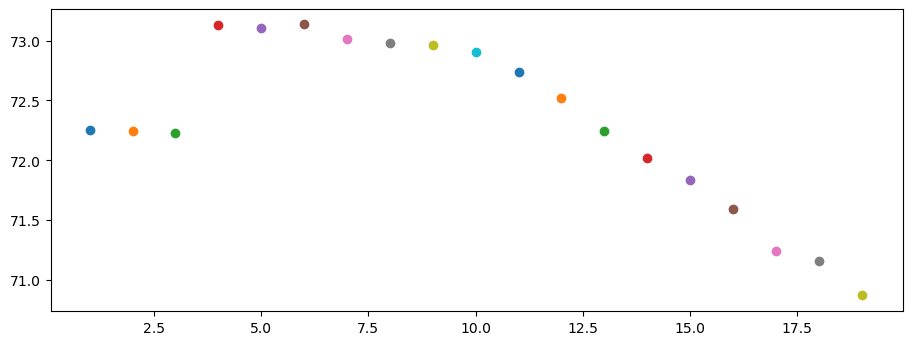

In [50]:
from sklearn.tree import DecisionTreeClassifier
seed=78479
np.random.seed(seed)
for i in range(1,20):
    tree = DecisionTreeClassifier(criterion='gini',max_depth=i ,random_state=1)  
    tree.fit(X_train, y_train) 
    y_pred =tree.predict(X_test)
    kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
    score = cross_val_score(tree, X_test, y_test)
    mean=score.mean()*100
    plt.scatter(i, mean)
    print(mean)
plt.show()

In [70]:
# According to this, we need to choose max_depth=6:
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [71]:
#Prediction
DT_yhat = DT_model.predict(X_test)

In [72]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, DT_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, DT_yhat))
print("F1-score: %.2f" % f1_score(y_test, DT_yhat, average='weighted') )
print(classification_report(y_test, DT_yhat))

Train set Accuracy:  0.7313760624856421
Test set Accuracy:  0.7320542507442938
F1-score: 0.69
              precision    recall  f1-score   support

           1       0.73      0.94      0.82     24117
           2       0.74      0.31      0.44     12159

    accuracy                           0.73     36276
   macro avg       0.73      0.63      0.63     36276
weighted avg       0.73      0.73      0.69     36276



Confusion matrix, without normalization
[[22761  1356]
 [ 8364  3795]]
Normalized confusion matrix
[[0.9437741  0.0562259 ]
 [0.68788552 0.31211448]]


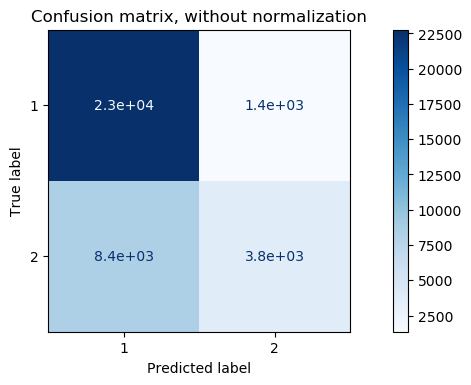

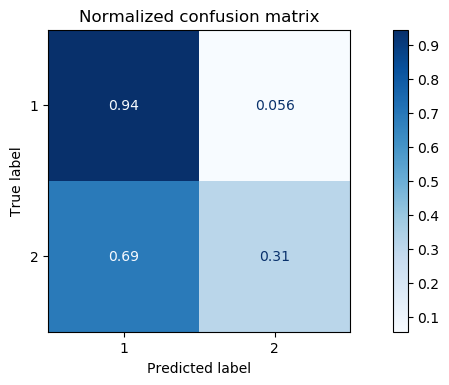

In [73]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(DT_model, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

### Support Vector Machine (SVM)

In [75]:
from sklearn import svm
SVM_model = svm.LinearSVC()
SVM_model.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [76]:
SVM_yhat = SVM_model.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, SVM_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, SVM_yhat))
print("F1-score: %.2f" % f1_score(y_test, SVM_yhat, average='weighted') )
print(classification_report(y_test, SVM_yhat))

Train set Accuracy:  0.7318355157362738
Test set Accuracy:  0.7327985444922263
F1-score: 0.70
              precision    recall  f1-score   support

           1       0.73      0.94      0.82     24117
           2       0.73      0.32      0.44     12159

    accuracy                           0.73     36276
   macro avg       0.73      0.63      0.63     36276
weighted avg       0.73      0.73      0.70     36276



Confusion matrix, without normalization
[[22712  1405]
 [ 8288  3871]]
Normalized confusion matrix
[[0.94174234 0.05825766]
 [0.681635   0.318365  ]]


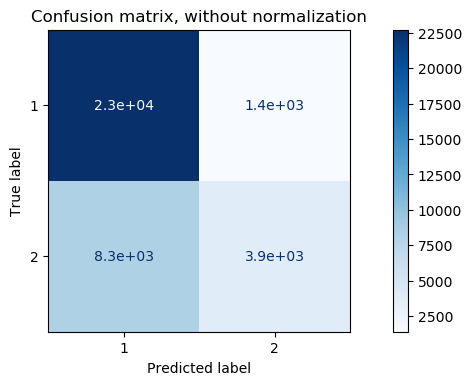

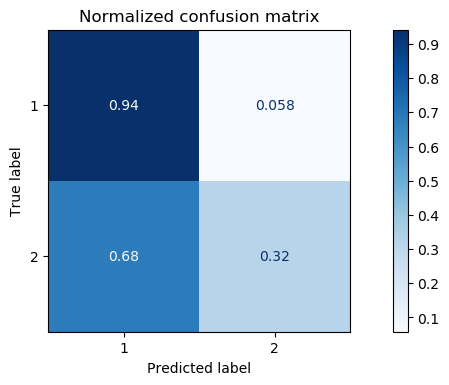

In [77]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(SVM_model, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)